# Debug

## Bug: 
```
System 2 parameters: {'sigma_u': 9.0, 'sigma_b': 0.060145439998495594, 'rho': 1179.133813806039, 'd': 0.7827636158617441, 'label': 1}
Steady state series saved to data_12_04_2025/mRNA_trajectories_variance_3083_1200/steady_state_trajectories/m_traj_3083.9999999999986_1200.0_9_SS.csv
...
...
Attempt 1/10
Attempt 2/10
Attempt 3/10
Attempt 4/10
Attempt 5/10
Attempt 6/10
Attempt 7/10
Attempt 8/10
Attempt 9/10
Attempt 10/10
No suitable solution found after multiple attempts. Try increasing num_guesses or widening the ranges.
[STRESS] ❌ No suitable solution found.
Attempt 1/10
[NORMAL] ✅ Found: {'rho': 1179.1338138059837, 'sigma_b': 0.060145439998495545, 'd': 0.7827636158617439}
Traceback (most recent call last):
  File "/home/ianyang/stochastic_simulations/experiments/SSA_telegraph_model/var_v_accuracy_plot/var_v_accuracy_12_04_2025.py", line 92, in <module>
    "sigma_b": results["stress"]['sigma_b'], 
               ~~~~~~~^^^^^^^^^^
KeyError: 'stress'
```

## Issue: simulation.mean_var_autocorr.find_parameters

In [ ]:
# find the variance ratio that went wrong
import numpy as np
from simulation.mean_var_autocorr import find_parameters
import tqdm 
###############################################################################
# 1) Define target mean, variance and autocorrelations, and some parameters to start with
###############################################################################
variance_target_normal = 1200.0  # Fixed normal variance
mu_target = 10.0                 # Mean (same for both)
variance_ratios = np.arange(0.1, 3.0, 0.01)

# this is the ratio that went wrong
current_ratio = variance_ratios[248]
print(current_ratio)

autocorr_target = 0.5

parameters = {
    "stress": {"sigma_u": 18.0},
    "normal": {"sigma_u": 9.0}
}



###############################################################################
# 2) Loop over different variance ratios
###############################################################################
for ratio in tqdm.tqdm(variance_ratios[248:], desc="Running Variance Ratio Simulations"):
    # For the stress condition, we define variance_target_stress by ratio
    variance_target_stress = ratio * variance_target_normal

    # store results for each condition
    results = {}
    for condition, param in parameters.items():
        # Decide which variance to use for this condition
        if condition == "normal":
            var_for_condition = variance_target_normal
        else:  # condition == "stress"
            var_for_condition = variance_target_stress

        try:
            # Fix all three statistical properties
            rho, sigma_b, d = find_parameters(
                param, mu_target, var_for_condition, autocorr_target, 
                rho_range = (1,1000) , num_guesses=1000 # debug
            )

            results[condition] = {"rho": rho, "sigma_b": sigma_b, "d": d}
            print(f"[{condition.upper()}] ✅ Found: {results[condition]}")
        except ValueError as e:
            print(f'{e}')
            print(f"[{condition.upper()}] ❌ No suitable solution found.")


    # update parameter sets 
    parameter_sets = [
        {"sigma_u": parameters["stress"]["sigma_u"], 
        "sigma_b": results["stress"]['sigma_b'], 
        "rho": results["stress"]['rho'], 
        "d": results["stress"]['d'], 
        "label": 0},
        
        {"sigma_u": parameters["normal"]["sigma_u"], 
        "sigma_b": results["normal"]['sigma_b'], 
        "rho": results["normal"]['rho'], 
        "d": results["normal"]['d'], 
        "label": 1}
    ]

    # Output the results
    print("Updated Parameter Sets:", parameter_sets)

    # Simulation parameters
    min_d = min(pset['d'] for pset in parameter_sets)
    steady_state_time = int(10 / min_d)
    time_points = np.arange(0, 144.0, 1.0)
    extended_time_points = np.arange(
        time_points[0],
        len(time_points) + steady_state_time,
        time_points[1] - time_points[0]
    )
    size = 200
    num_iterations = 10

2.5799999999999987


Running Variance Ratio Simulations:   0%|          | 0/42 [00:00<?, ?it/s]

Attempt 1/10


/home/ianyang/stochastic_simulations/src/simulation/mean_var_autocorr.py:32: RuntimeWarning: invalid value encountered in multiply
  ACmRNA_eq = sp.exp(-d * t) * (
/home/ianyang/stochastic_simulations/src/simulation/mean_var_autocorr.py:33: RuntimeWarning: invalid value encountered in multiply
  d * sp.exp((d - sigma_u - sigma_b) * t) * rho * sigma_u
/home/ianyang/stochastic_simulations/src/simulation/mean_var_autocorr.py:164: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  solution = fsolve(
/home/ianyang/stochastic_simulations/src/simulation/mean_var_autocorr.py:164: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  solution = fsolve(
/home/ianyang/stochastic_simulations/src/simulation/mean_var_autocorr.py:164: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  solution = fsolve(


Attempt 2/10
[STRESS] ✅ Found: {'rho': 5795.902957821557, 'sigma_b': 0.022843952095094676, 'd': 0.7346306158352103}
Attempt 1/10


Running Variance Ratio Simulations:   2%|▏         | 1/42 [04:00<2:44:20, 240.50s/it]

[NORMAL] ✅ Found: {'rho': 1179.1338138131455, 'sigma_b': 0.06014543999856846, 'd': 0.7827636158617561}
Updated Parameter Sets: [{'sigma_u': 18.0, 'sigma_b': 0.022843952095094676, 'rho': 5795.902957821557, 'd': 0.7346306158352103, 'label': 0}, {'sigma_u': 9.0, 'sigma_b': 0.06014543999856846, 'rho': 1179.1338138131455, 'd': 0.7827636158617561, 'label': 1}]
Attempt 1/10


Running Variance Ratio Simulations:   2%|▏         | 1/42 [04:25<3:01:22, 265.44s/it]


KeyboardInterrupt: 

In [ ]:
###### var_v_accuracy_12_04_2025.py ######
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import os
import tqdm
# from sympy import sqrt
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# import sympy as sp
# from sympy import init_printing, solve
# from scipy.optimize import fsolve

# Import your own local modules/functions
from simulation.simulate_telegraph_model import simulate_two_telegraph_model_systems
from stats.report import statistical_report

from utils.load_data import load_and_split_data
from utils.steady_state import save_steady_state
from simulation.mean_var_autocorr import find_parameters
from classifiers.lstm_classifier import lstm_classifier
from classifiers.lstm_conv1d_classifier import lstm_conv1d_classifier
from classifiers.svm_classifier import svm_classifier
from classifiers.random_forest_classifier import random_forest_classifier
from classifiers.logistic_regression_classifier import logistic_regression_classifier
from classifiers.mlp_classifier import mlp_classifier
from classifiers.random_classifier import random_classifier

############# READ THIS ################
# 1. After finetuning the LSTM architercture and hyperparameters, I am now running some classification benchmarks using the new model (saved in the folder 'src/classifiers/lstm_conv1d_classifier.py').: 
# hidden_size      64.000
# num_layers        2.000
# dropout_rate      0.010
# learning_rate     0.001
# batch_size       32.000
# 2. We want ONLY the steady state part of the data for the classification task, we use save_steady_state() to get the steady state part of the data.
# 3. We want to extend the time points to get enough steady state data.

############# READ THIS ################


###############################################################################
# 1) Define target mean, variance and autocorrelations, and some parameters to start with
###############################################################################
variance_target_normal = 1200.0  # Fixed normal variance
mu_target = 10.0                 # Mean (same for both)
variance_ratios = np.arange(0.1, 3.0, 0.01)
autocorr_target = 0.5

parameters = {
    "stress": {"sigma_u": 18.0},
    "normal": {"sigma_u": 9.0}
}

###############################################################################
# 2) Loop over different variance ratios
###############################################################################
for ratio in tqdm.tqdm(variance_ratios, desc="Running Variance Ratio Simulations"):
    # For the stress condition, we define variance_target_stress by ratio
    variance_target_stress = ratio * variance_target_normal

    # store results for each condition
    results = {}
    for condition, param in parameters.items():
        # Decide which variance to use for this condition
        if condition == "normal":
            var_for_condition = variance_target_normal
        else:  # condition == "stress"
            var_for_condition = variance_target_stress

        try:
            # Fix all three statistical properties
            rho, sigma_b, d = find_parameters(
                param, mu_target, var_for_condition, autocorr_target
            )

            results[condition] = {"rho": rho, "sigma_b": sigma_b, "d": d}
            print(f"[{condition.upper()}] ✅ Found: {results[condition]}")
        except ValueError as e:
            print(f'{e}')
            print(f"[{condition.upper()}] ❌ No suitable solution found.")


    # update parameter sets 
    parameter_sets = [
        {"sigma_u": parameters["stress"]["sigma_u"], 
        "sigma_b": results["stress"]['sigma_b'], 
        "rho": results["stress"]['rho'], 
        "d": results["stress"]['d'], 
        "label": 0},
        
        {"sigma_u": parameters["normal"]["sigma_u"], 
        "sigma_b": results["normal"]['sigma_b'], 
        "rho": results["normal"]['rho'], 
        "d": results["normal"]['d'], 
        "label": 1}
    ]

    # Output the results
    print("Updated Parameter Sets:", parameter_sets)

    # Simulation parameters
    min_d = min(pset['d'] for pset in parameter_sets)
    steady_state_time = int(10 / min_d)
    time_points = np.arange(0, 144.0, 1.0)
    extended_time_points = np.arange(
        time_points[0],
        len(time_points) + steady_state_time,
        time_points[1] - time_points[0]
    )
    size = 200
    num_iterations = 10

    ###########################################################################
    # 3) Simulate & Save data
    ###########################################################################
    for i in range(num_iterations):
        df_results = simulate_two_telegraph_model_systems(parameter_sets, extended_time_points, size)

        output_dir = f"data_12_04_2025/mRNA_trajectories_variance_{int(variance_target_stress)}_{int(variance_target_normal)}"
        os.makedirs(output_dir, exist_ok=True)
        # save full time series
        output_file = f"{output_dir}/m_traj_{variance_target_stress}_{variance_target_normal}_{i}.csv"
        df_results.to_csv(output_file, index=False)

        # get only the steady state part of the data
        save_path = f'{output_dir}/steady_state_trajectories/'
        remaining_time_points, steady_state_series = save_steady_state(output_file, parameter_sets, time_points,
                                                                       save_path=save_path,)

        #######################################################################
        # 4) Analysis & classification (optional, can be done post-hoc)
        #######################################################################
        stress_trajectories = steady_state_series[steady_state_series['label'] == 0].iloc[:, 1:].values
        normal_trajectories = steady_state_series[steady_state_series['label'] == 1].iloc[:, 1:].values
        stats = statistical_report(parameter_sets, stress_trajectories, normal_trajectories)

        # read in the steady state data
        steady_state_file = os.path.join(save_path, f"{os.path.splitext(os.path.basename(output_file))[0]}_SS.csv") # this is the file name we saved it as

        # classifiers
        X_train, X_val, X_test, y_train, y_val, y_test = load_and_split_data(steady_state_file, split_val_size=0.2) # we must define split_val_size here to get a validation set
        svm_rbf_accuracy = svm_classifier(X_train, X_test, y_train, y_test)
        svm_linear_accuracy = svm_classifier(X_train, X_test, y_train, y_test, svm_kernel='linear')
        rf_accuracy = random_forest_classifier(X_train, X_test, y_train, y_test)
        log_reg_accuracy = logistic_regression_classifier(X_train, X_test, y_train, y_test)
        mlp_accuracy = mlp_classifier(X_train, X_val, X_test, y_train, y_val, y_test, epochs=100)
        random_accuracy = random_classifier(y_test)
        lstm_accuracy = lstm_classifier(X_train, X_val, X_test, y_train, y_val, y_test, epochs=50)
        lstm_conv1d_accuracy = lstm_conv1d_classifier(X_train, X_val, X_test, y_train, y_val, y_test, epochs=50)

        df_acc_results = pd.DataFrame({
            "Parameter Sets": [parameter_sets],
            "Stats": [stats],
            "Variance Ratio": [ratio],
            "SVM (rbf) Accuracy": [svm_rbf_accuracy],
            "SVM (linear) Accuracy": [svm_linear_accuracy],
            "Random Forest Accuracy": [rf_accuracy],
            "Logistic Regression Accuracy": [log_reg_accuracy],
            "MLP Accuracy": [mlp_accuracy],
            "Random Classifier Accuracy": [random_accuracy],
            "LSTM Accuracy": [lstm_accuracy],
            "LSTM Conv1D Accuracy": [lstm_conv1d_accuracy]
        })

        # Save the accuracy results to a CSV file
        if not os.path.isfile("data_12_04_2025/accuracy_results_12_04_2025.csv"):
            df_acc_results.to_csv("data_12_04_2025/accuracy_results_12_04_2025.csv", index=False)
        else:
            df_acc_results.to_csv("data_12_04_2025/accuracy_results_12_04_2025.csv", mode='a', header=False, index=False)

In [2]:
from simulation.mean_var_autocorr import check_biological_appropriateness, find_parameters
import numpy as np
import tqdm
%load_ext autoreload
%autoreload 2

# Define a function to try different values
def find_biologically_appropriate_parameters(target_cv_initial=1.7, mu_target_initial=5, max_attempts=10):
    # Try different combinations of CV and mean until we find biologically appropriate values
    for attempt in range(max_attempts):
        # On first attempt, use the initial values
        if attempt == 0:
            target_cv = target_cv_initial
            mu = mu_target_initial
        # On subsequent attempts, adjust the values
        else:
            # Try reducing CV or increasing mean to improve Fano factor and CV
            target_cv = target_cv_initial * (0.9 - attempt * 0.05)  # Gradually reduce CV
            mu = mu_target_initial * (1.1 + attempt * 0.1)         # Gradually increase mean
        
        # Calculate corresponding variance
        variance = (target_cv * mu)**2
        
        print(f"\nAttempt {attempt+1}/{max_attempts}")
        print(f"Testing: CV = {target_cv:.2f}, Mean = {mu:.2f}, Variance = {variance:.2f}")
        
        # Check if these values are biologically appropriate
        is_appropriate = check_biological_appropriateness(variance, mu)
        
        if is_appropriate:
            print(f"✅ Found biologically appropriate values: CV = {target_cv:.2f}, Mean = {mu:.2f}, Variance = {variance:.2f}")
            return target_cv, mu, variance
    
    # If we reach here, we couldn't find appropriate parameters
    print("❌ Could not find biologically appropriate parameters")
    return None, None, None

# Function to pre-check all CV ratios for biological appropriateness
def find_parameters_without_skipping(initial_cv_normal=1.7, initial_mu_target=5, cv_ratios=np.arange(0.1, 3.0, 0.01), max_attempts=5):
    for attempt in range(max_attempts):
        # On first attempt, use the initial values
        if attempt == 0:
            cv_normal = initial_cv_normal
            mu = initial_mu_target
        # On subsequent attempts, adjust the values
        else:
            # Try decreasing CV and increasing mean to improve all conditions
            cv_normal = initial_cv_normal * (0.85 - attempt * 0.05)  # More aggressive CV reduction
            mu = initial_mu_target * (1.3 + attempt * 0.2)          # More aggressive mean increase
        
        # Calculate normal variance
        variance_normal = (cv_normal * mu)**2
        
        print(f"\nTesting parameters: CV normal = {cv_normal:.2f}, Mean = {mu:.2f}")
        
        # Check if normal condition is biologically appropriate
        is_normal_appropriate = check_biological_appropriateness(variance_normal, mu)
        if not is_normal_appropriate:
            print(f"⚠️ Normal condition not biologically appropriate. Trying different parameters...")
            continue
        
        # Check all CV ratios for the stress condition
        all_appropriate = True
        inappropriate_ratios = []
        
        for ratio in tqdm.tqdm(cv_ratios, desc="Checking all CV ratios"):
            cv_stress = ratio * cv_normal
            variance_stress = (cv_stress * mu)**2
            
            is_stress_appropriate = check_biological_appropriateness(variance_stress, mu)
            if not is_stress_appropriate:
                all_appropriate = False
                inappropriate_ratios.append(ratio)
        
        if all_appropriate:
            print(f"✅ Found parameters where all CV ratios are biologically appropriate!")
            print(f"CV normal = {cv_normal:.2f}, Mean = {mu:.2f}, Variance normal = {variance_normal:.2f}")
            return cv_normal, mu, variance_normal
        else:
            print(f"⚠️ {len(inappropriate_ratios)} out of {len(cv_ratios)} CV ratios are not biologically appropriate")
            print(f"First few inappropriate ratios: {inappropriate_ratios[:5]}")
    
    print("❌ Could not find parameters where all CV ratios are biologically appropriate")
    print("You may need to adjust the range of CV ratios or try more extreme parameter values")
    return None, None, None

# Range of CV ratios to test (stress CV / normal CV)
cv_ratio = np.arange(0.1, 3.0, 0.01)  

# Set initial parameters for search
initial_cv_normal = 0.8  # Try a lower initial CV for normal condition
initial_mu_target = 15   # Try a higher initial mean
autocorr_target = 0.5    # Autocorrelation (same for both conditions)

# Find biologically appropriate parameters for normal condition
target_cv_normal, mu_target, variance_normal = find_biologically_appropriate_parameters(
    target_cv_initial=initial_cv_normal, 
    mu_target_initial=initial_mu_target
)

# Range of CV ratios to test (stress CV / normal CV)
cv_ratio = np.arange(0.1, 3.0, 0.01)  

# Initial parameters
parameters = {
    "stress": {"sigma_u": 18.0},
    "normal": {"sigma_u": 9.0}
}

print(f"\nStarting simulations with:")
print(f"Normal CV: {target_cv_normal:.2f}, Mean: {mu_target:.2f}, Variance: {variance_normal:.2f}")

###############################################################################
# 2) Loop over different CV ratios
###############################################################################

for ratio in tqdm.tqdm(cv_ratio, desc="Running CV Ratio Simulations"):
    # For the stress condition, we define CV by ratio
    target_cv_stress = ratio * target_cv_normal
    
    # Calculate corresponding variance values for reporting only
    variance_stress = (target_cv_stress * mu_target)**2
    
    print(f"\nTesting CV ratio: {ratio:.2f}, Stress CV: {target_cv_stress:.2f}, Normal CV: {target_cv_normal:.2f}")
    print(f"Corresponding variances - Stress: {variance_stress:.2f}, Normal: {variance_normal:.2f}")
    
    # Check if stress parameters are biologically appropriate
    is_stress_appropriate = check_biological_appropriateness(variance_stress, mu_target)
    
    # If stress parameters are not biologically appropriate, skip this iteration
    if not is_stress_appropriate:
        print(f"⚠️ Stress parameters are not biologically appropriate for ratio {ratio:.2f}. Skipping.")
        continue

    # Store results for each condition
    results = {}
    success = True  # Track if both conditions succeed
    
    for condition, param in parameters.items():
        # Decide which CV to use for this condition
        if condition == "normal":
            cv_for_condition = target_cv_normal
        else:  # condition == "stress"
            cv_for_condition = target_cv_stress

        try:
            # Fix mean, CV, and autocorrelation
            rho, sigma_b, d = find_parameters(
                param, mu_target=mu_target, variance_target=None, autocorr_target=autocorr_target, 
                cv_target=cv_for_condition, check_biological=True
            )

            results[condition] = {"rho": rho, "sigma_b": sigma_b, "d": d}
            print(f"[{condition.upper()}] ✅ Found: {results[condition]}")
        except ValueError as e:
            print(f'{e}')
            print(f"[{condition.upper()}] ❌ No suitable solution found.")
            success = False
    
    # If any condition failed, skip to the next ratio
    if not success:
        print(f"Skipping ratio {ratio:.2f} due to parameter finding failure")
        continue

    # update parameter sets 
    parameter_sets = [
        {"sigma_u": parameters["stress"]["sigma_u"], 
        "sigma_b": results["stress"]['sigma_b'], 
        "rho": results["stress"]['rho'], 
        "d": results["stress"]['d'], 
        "label": 0},
        
        {"sigma_u": parameters["normal"]["sigma_u"], 
        "sigma_b": results["normal"]['sigma_b'], 
        "rho": results["normal"]['rho'], 
        "d": results["normal"]['d'], 
        "label": 1}
    ]

    # Output the results
    print("Updated Parameter Sets:", parameter_sets)

# Pre-check parameters for all CV ratios
find_parameters_without_skipping(
    initial_cv_normal=target_cv_normal, 
    initial_mu_target=mu_target, 
    cv_ratios=cv_ratio, 
    max_attempts=5
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Attempt 1/10
Testing: CV = 0.80, Mean = 15.00, Variance = 144.00
✅ System is biologically appropriate with Fano factor: 9.60, CV: 0.80
✅ Found biologically appropriate values: CV = 0.80, Mean = 15.00, Variance = 144.00

Starting simulations with:
Normal CV: 0.80, Mean: 15.00, Variance: 144.00


Running CV Ratio Simulations:   0%|          | 0/290 [00:00<?, ?it/s]


Testing CV ratio: 0.10, Stress CV: 0.08, Normal CV: 0.80
Corresponding variances - Stress: 1.44, Normal: 144.00
⚠️ WARNING: Fano factor 0.10 < 1, consider changing the target parameters.
⚠️ Stress parameters are not biologically appropriate for ratio 0.10. Skipping.

Testing CV ratio: 0.11, Stress CV: 0.09, Normal CV: 0.80
Corresponding variances - Stress: 1.74, Normal: 144.00
⚠️ WARNING: Fano factor 0.12 < 1, consider changing the target parameters.
⚠️ Stress parameters are not biologically appropriate for ratio 0.11. Skipping.

Testing CV ratio: 0.12, Stress CV: 0.10, Normal CV: 0.80
Corresponding variances - Stress: 2.07, Normal: 144.00
⚠️ WARNING: Fano factor 0.14 < 1, consider changing the target parameters.
⚠️ Stress parameters are not biologically appropriate for ratio 0.12. Skipping.

Testing CV ratio: 0.13, Stress CV: 0.10, Normal CV: 0.80
Corresponding variances - Stress: 2.43, Normal: 144.00
⚠️ WARNING: Fano factor 0.16 < 1, consider changing the target parameters.
⚠️ Stres

Running CV Ratio Simulations:   8%|▊         | 23/290 [00:05<01:08,  3.88it/s]



KeyboardInterrupt: 

In [4]:
cv_ratio = np.arange(0.5, 2.0, 0.01)  

# Try to find parameters that work for all CV ratios
print("Finding parameters where all CV ratios are biologically appropriate...")
target_cv_normal, mu_target, variance_normal = find_parameters_without_skipping(
    initial_cv_normal=initial_cv_normal, 
    initial_mu_target=initial_mu_target,
    cv_ratios=cv_ratio,
    max_attempts=10  # Increase max attempts to try more parameter combinations
)

# If we couldn't find parameters that work for all ratios, use the original function
if target_cv_normal is None:
    print("\nFalling back to finding biologically appropriate parameters for normal condition only...")
    target_cv_normal, mu_target, variance_normal = find_biologically_appropriate_parameters(
        target_cv_initial=initial_cv_normal, 
        mu_target_initial=initial_mu_target
    )

# Initial parameters for telegraph model
parameters = {
    "stress": {"sigma_u": 18.0},
    "normal": {"sigma_u": 9.0}
}

print(f"\nStarting simulations with:")
print(f"Normal CV: {target_cv_normal:.2f}, Mean: {mu_target:.2f}, Variance: {variance_normal:.2f}")

# If only some ratios were inappropriate, you could narrow down the range
# For example:
# cv_ratio = np.arange(0.5, 2.0, 0.01)  # Example of a narrower range if needed

Finding parameters where all CV ratios are biologically appropriate...

Testing parameters: CV normal = 0.80, Mean = 15.00
✅ System is biologically appropriate with Fano factor: 9.60, CV: 0.80


Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 132591.28it/s]


✅ System is biologically appropriate with Fano factor: 2.40, CV: 0.40
✅ System is biologically appropriate with Fano factor: 2.50, CV: 0.41
✅ System is biologically appropriate with Fano factor: 2.60, CV: 0.42
✅ System is biologically appropriate with Fano factor: 2.70, CV: 0.42
✅ System is biologically appropriate with Fano factor: 2.80, CV: 0.43
✅ System is biologically appropriate with Fano factor: 2.90, CV: 0.44
✅ System is biologically appropriate with Fano factor: 3.01, CV: 0.45
✅ System is biologically appropriate with Fano factor: 3.12, CV: 0.46
✅ System is biologically appropriate with Fano factor: 3.23, CV: 0.46
✅ System is biologically appropriate with Fano factor: 3.34, CV: 0.47
✅ System is biologically appropriate with Fano factor: 3.46, CV: 0.48
✅ System is biologically appropriate with Fano factor: 3.57, CV: 0.49
✅ System is biologically appropriate with Fano factor: 3.69, CV: 0.50
✅ System is biologically appropriate with Fano factor: 3.81, CV: 0.50
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 147582.83it/s]


✅ System is biologically appropriate with Fano factor: 2.30, CV: 0.32
✅ System is biologically appropriate with Fano factor: 2.40, CV: 0.33
✅ System is biologically appropriate with Fano factor: 2.49, CV: 0.33
✅ System is biologically appropriate with Fano factor: 2.59, CV: 0.34
✅ System is biologically appropriate with Fano factor: 2.69, CV: 0.35
✅ System is biologically appropriate with Fano factor: 2.79, CV: 0.35
✅ System is biologically appropriate with Fano factor: 2.89, CV: 0.36
✅ System is biologically appropriate with Fano factor: 2.99, CV: 0.36
✅ System is biologically appropriate with Fano factor: 3.10, CV: 0.37
✅ System is biologically appropriate with Fano factor: 3.21, CV: 0.38
✅ System is biologically appropriate with Fano factor: 3.32, CV: 0.38
✅ System is biologically appropriate with Fano factor: 3.43, CV: 0.39
✅ System is biologically appropriate with Fano factor: 3.54, CV: 0.40
✅ System is biologically appropriate with Fano factor: 3.66, CV: 0.40
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 143378.67it/s]


✅ System is biologically appropriate with Fano factor: 2.30, CV: 0.30
✅ System is biologically appropriate with Fano factor: 2.39, CV: 0.31
✅ System is biologically appropriate with Fano factor: 2.48, CV: 0.31
✅ System is biologically appropriate with Fano factor: 2.58, CV: 0.32
✅ System is biologically appropriate with Fano factor: 2.68, CV: 0.32
✅ System is biologically appropriate with Fano factor: 2.78, CV: 0.33
✅ System is biologically appropriate with Fano factor: 2.88, CV: 0.34
✅ System is biologically appropriate with Fano factor: 2.98, CV: 0.34
✅ System is biologically appropriate with Fano factor: 3.09, CV: 0.35
✅ System is biologically appropriate with Fano factor: 3.20, CV: 0.35
✅ System is biologically appropriate with Fano factor: 3.30, CV: 0.36
✅ System is biologically appropriate with Fano factor: 3.42, CV: 0.37
✅ System is biologically appropriate with Fano factor: 3.53, CV: 0.37
✅ System is biologically appropriate with Fano factor: 3.64, CV: 0.38
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 121974.72it/s]


✅ System is biologically appropriate with Fano factor: 2.23, CV: 0.28
✅ System is biologically appropriate with Fano factor: 2.32, CV: 0.29
✅ System is biologically appropriate with Fano factor: 2.42, CV: 0.29
✅ System is biologically appropriate with Fano factor: 2.51, CV: 0.30
✅ System is biologically appropriate with Fano factor: 2.61, CV: 0.30
✅ System is biologically appropriate with Fano factor: 2.70, CV: 0.31
✅ System is biologically appropriate with Fano factor: 2.80, CV: 0.31
✅ System is biologically appropriate with Fano factor: 2.90, CV: 0.32
✅ System is biologically appropriate with Fano factor: 3.01, CV: 0.32
✅ System is biologically appropriate with Fano factor: 3.11, CV: 0.33
✅ System is biologically appropriate with Fano factor: 3.22, CV: 0.34
✅ System is biologically appropriate with Fano factor: 3.33, CV: 0.34
✅ System is biologically appropriate with Fano factor: 3.44, CV: 0.35
✅ System is biologically appropriate with Fano factor: 3.55, CV: 0.35
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 142922.67it/s]


✅ System is biologically appropriate with Fano factor: 2.13, CV: 0.26
✅ System is biologically appropriate with Fano factor: 2.22, CV: 0.27
✅ System is biologically appropriate with Fano factor: 2.30, CV: 0.27
✅ System is biologically appropriate with Fano factor: 2.39, CV: 0.28
✅ System is biologically appropriate with Fano factor: 2.48, CV: 0.28
✅ System is biologically appropriate with Fano factor: 2.58, CV: 0.29
✅ System is biologically appropriate with Fano factor: 2.67, CV: 0.29
✅ System is biologically appropriate with Fano factor: 2.77, CV: 0.30
✅ System is biologically appropriate with Fano factor: 2.87, CV: 0.30
✅ System is biologically appropriate with Fano factor: 2.96, CV: 0.31
✅ System is biologically appropriate with Fano factor: 3.07, CV: 0.31
✅ System is biologically appropriate with Fano factor: 3.17, CV: 0.32
✅ System is biologically appropriate with Fano factor: 3.27, CV: 0.32
✅ System is biologically appropriate with Fano factor: 3.38, CV: 0.33
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 145973.46it/s]

✅ System is biologically appropriate with Fano factor: 1.99, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.07, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.15, CV: 0.25
✅ System is biologically appropriate with Fano factor: 2.23, CV: 0.25
✅ System is biologically appropriate with Fano factor: 2.32, CV: 0.26
✅ System is biologically appropriate with Fano factor: 2.40, CV: 0.26
✅ System is biologically appropriate with Fano factor: 2.49, CV: 0.27
✅ System is biologically appropriate with Fano factor: 2.58, CV: 0.27
✅ System is biologically appropriate with Fano factor: 2.67, CV: 0.28
✅ System is biologically appropriate with Fano factor: 2.77, CV: 0.28
✅ System is biologically appropriate with Fano factor: 2.86, CV: 0.29
✅ System is biologically appropriate with Fano factor: 2.96, CV: 0.29
✅ System is biologically appropriate with Fano factor: 3.06, CV: 0.30
✅ System is biologically appropriate with Fano factor: 3.15, CV: 0.30
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 141987.27it/s]


✅ System is biologically appropriate with Fano factor: 1.81, CV: 0.22
✅ System is biologically appropriate with Fano factor: 1.89, CV: 0.22
✅ System is biologically appropriate with Fano factor: 1.96, CV: 0.23
✅ System is biologically appropriate with Fano factor: 2.04, CV: 0.23
✅ System is biologically appropriate with Fano factor: 2.12, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.20, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.28, CV: 0.25
✅ System is biologically appropriate with Fano factor: 2.36, CV: 0.25
✅ System is biologically appropriate with Fano factor: 2.44, CV: 0.26
✅ System is biologically appropriate with Fano factor: 2.53, CV: 0.26
✅ System is biologically appropriate with Fano factor: 2.61, CV: 0.26
✅ System is biologically appropriate with Fano factor: 2.70, CV: 0.27
✅ System is biologically appropriate with Fano factor: 2.79, CV: 0.27
✅ System is biologically appropriate with Fano factor: 2.88, CV: 0.28
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 143313.35it/s]


✅ System is biologically appropriate with Fano factor: 1.62, CV: 0.20
✅ System is biologically appropriate with Fano factor: 1.69, CV: 0.20
✅ System is biologically appropriate with Fano factor: 1.75, CV: 0.21
✅ System is biologically appropriate with Fano factor: 1.82, CV: 0.21
✅ System is biologically appropriate with Fano factor: 1.89, CV: 0.22
✅ System is biologically appropriate with Fano factor: 1.96, CV: 0.22
✅ System is biologically appropriate with Fano factor: 2.03, CV: 0.22
✅ System is biologically appropriate with Fano factor: 2.11, CV: 0.23
✅ System is biologically appropriate with Fano factor: 2.18, CV: 0.23
✅ System is biologically appropriate with Fano factor: 2.26, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.33, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.41, CV: 0.24
✅ System is biologically appropriate with Fano factor: 2.49, CV: 0.25
✅ System is biologically appropriate with Fano factor: 2.57, CV: 0.25
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 91712.19it/s]


✅ System is biologically appropriate with Fano factor: 1.41, CV: 0.18
✅ System is biologically appropriate with Fano factor: 1.47, CV: 0.18
✅ System is biologically appropriate with Fano factor: 1.52, CV: 0.19
✅ System is biologically appropriate with Fano factor: 1.58, CV: 0.19
✅ System is biologically appropriate with Fano factor: 1.64, CV: 0.19
✅ System is biologically appropriate with Fano factor: 1.71, CV: 0.20
✅ System is biologically appropriate with Fano factor: 1.77, CV: 0.20
✅ System is biologically appropriate with Fano factor: 1.83, CV: 0.21
✅ System is biologically appropriate with Fano factor: 1.90, CV: 0.21
✅ System is biologically appropriate with Fano factor: 1.96, CV: 0.21
✅ System is biologically appropriate with Fano factor: 2.03, CV: 0.22
✅ System is biologically appropriate with Fano factor: 2.10, CV: 0.22
✅ System is biologically appropriate with Fano factor: 2.17, CV: 0.22
✅ System is biologically appropriate with Fano factor: 2.24, CV: 0.23
✅ System is biologic

Checking all CV ratios: 100%|██████████| 150/150 [00:00<00:00, 147409.93it/s]

✅ System is biologically appropriate with Fano factor: 1.19, CV: 0.16
✅ System is biologically appropriate with Fano factor: 1.24, CV: 0.16
✅ System is biologically appropriate with Fano factor: 1.29, CV: 0.17
✅ System is biologically appropriate with Fano factor: 1.34, CV: 0.17
✅ System is biologically appropriate with Fano factor: 1.39, CV: 0.17
✅ System is biologically appropriate with Fano factor: 1.44, CV: 0.18
✅ System is biologically appropriate with Fano factor: 1.49, CV: 0.18
✅ System is biologically appropriate with Fano factor: 1.55, CV: 0.18
✅ System is biologically appropriate with Fano factor: 1.60, CV: 0.19
✅ System is biologically appropriate with Fano factor: 1.66, CV: 0.19
✅ System is biologically appropriate with Fano factor: 1.71, CV: 0.19
✅ System is biologically appropriate with Fano factor: 1.77, CV: 0.20
✅ System is biologically appropriate with Fano factor: 1.83, CV: 0.20
✅ System is biologically appropriate with Fano factor: 1.89, CV: 0.20
✅ System is biologic

In [5]:
###############################################################################
# 2) Loop over different CV ratios with optimized parameters
###############################################################################

# Now we can run the CV ratio loop with confidence that we've found parameters
# that should work for all ratios
inappropriate_ratios = []

for ratio in tqdm.tqdm(cv_ratio, desc="Running CV Ratio Simulations"):
    # For the stress condition, we define CV by ratio
    target_cv_stress = ratio * target_cv_normal
    
    # Calculate corresponding variance values for reporting only
    variance_stress = (target_cv_stress * mu_target)**2
    
    print(f"\nTesting CV ratio: {ratio:.2f}, Stress CV: {target_cv_stress:.2f}, Normal CV: {target_cv_normal:.2f}")
    print(f"Corresponding variances - Stress: {variance_stress:.2f}, Normal: {variance_normal:.2f}")
    
    # Double-check if stress parameters are biologically appropriate
    is_stress_appropriate = check_biological_appropriateness(variance_stress, mu_target)
    
    # If stress parameters are not biologically appropriate, track it and skip
    if not is_stress_appropriate:
        print(f"⚠️ Stress parameters are not biologically appropriate for ratio {ratio:.2f}. Skipping.")
        inappropriate_ratios.append(ratio)
        continue

    # Store results for each condition
    results = {}
    success = True  # Track if both conditions succeed
    
    for condition, param in parameters.items():
        # Decide which CV to use for this condition
        if condition == "normal":
            cv_for_condition = target_cv_normal
        else:  # condition == "stress"
            cv_for_condition = target_cv_stress

        try:
            # Fix mean, CV, and autocorrelation
            rho, sigma_b, d = find_parameters(
                param, mu_target=mu_target, variance_target=None, autocorr_target=autocorr_target, 
                cv_target=cv_for_condition, check_biological=True
            )

            results[condition] = {"rho": rho, "sigma_b": sigma_b, "d": d}
            print(f"[{condition.upper()}] ✅ Found: {results[condition]}")
        except ValueError as e:
            print(f'{e}')
            print(f"[{condition.upper()}] ❌ No suitable solution found.")
            success = False
    
    # If any condition failed, skip to the next ratio
    if not success:
        print(f"Skipping ratio {ratio:.2f} due to parameter finding failure")
        continue

    # update parameter sets 
    parameter_sets = [
        {"sigma_u": parameters["stress"]["sigma_u"], 
        "sigma_b": results["stress"]['sigma_b'], 
        "rho": results["stress"]['rho'], 
        "d": results["stress"]['d'], 
        "label": 0},
        
        {"sigma_u": parameters["normal"]["sigma_u"], 
        "sigma_b": results["normal"]['sigma_b'], 
        "rho": results["normal"]['rho'], 
        "d": results["normal"]['d'], 
        "label": 1}
    ]

    # Output the results
    print("Updated Parameter Sets:", parameter_sets)

# Summarize results
if len(inappropriate_ratios) == 0:
    print("\n✅ All CV ratios were biologically appropriate! No iterations were skipped.")
else:
    print(f"\n⚠️ {len(inappropriate_ratios)} out of {len(cv_ratio)} CV ratios were not biologically appropriate")
    print(f"Inappropriate ratios: {inappropriate_ratios[:10]}{'...' if len(inappropriate_ratios) > 10 else ''}")
    
    # Suggest parameter adjustment if needed
    if len(inappropriate_ratios) > len(cv_ratio) * 0.2:  # If more than 20% are inappropriate
        print("\nConsider trying again with different initial parameters:")
        print("1. Lower CV values (e.g., initial_cv_normal = 0.5)")
        print("2. Higher mean values (e.g., initial_mu_target = 20)")
        print("3. Narrowing your CV ratio range (e.g., cv_ratio = np.arange(0.5, 1.5, 0.01))")
    else:
        print("\nThe majority of CV ratios are biologically appropriate. You may proceed with these parameters.")


Running CV Ratio Simulations:   0%|          | 0/150 [00:00<?, ?it/s]


Testing CV ratio: 0.50, Stress CV: 0.16, Normal CV: 0.32
Corresponding variances - Stress: 55.35, Normal: 221.41
✅ System is biologically appropriate with Fano factor: 1.19, CV: 0.16
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.19, CV: 0.16
[STRESS] ✅ Found: {'rho': 44.764498238863645, 'sigma_b': 46.7068330777153, 'd': 0.6948819719012493}
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.19, CV: 0.16
[STRESS] ✅ Found: {'rho': 44.764498238863645, 'sigma_b': 46.7068330777153, 'd': 0.6948819719012493}
Attempt 1/10


Running CV Ratio Simulations:   1%|          | 1/150 [00:02<05:19,  2.14s/it]

✅ System is biologically appropriate with Fano factor: 4.76, CV: 0.32
[NORMAL] ✅ Found: {'rho': 91.0994661910079, 'sigma_b': 5.4008188964845685, 'd': 0.734742742570821}
Updated Parameter Sets: [{'sigma_u': 18.0, 'sigma_b': 46.7068330777153, 'rho': 44.764498238863645, 'd': 0.6948819719012493, 'label': 0}, {'sigma_u': 9.0, 'sigma_b': 5.4008188964845685, 'rho': 91.0994661910079, 'd': 0.734742742570821, 'label': 1}]

Testing CV ratio: 0.51, Stress CV: 0.16, Normal CV: 0.32
Corresponding variances - Stress: 57.59, Normal: 221.41
✅ System is biologically appropriate with Fano factor: 1.24, CV: 0.16
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.24, CV: 0.16
[STRESS] ✅ Found: {'rho': 46.55888774648159, 'sigma_b': 40.93224711364454, 'd': 0.6954441048779944}
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.24, CV: 0.16
[STRESS] ✅ Found: {'rho': 46.55888774648159, 'sigma_b': 40.93224711364454, 'd': 0.6954441048779944}
Attempt 1/10


Running CV Ratio Simulations:   1%|▏         | 2/150 [00:11<15:26,  6.26s/it]

✅ System is biologically appropriate with Fano factor: 4.76, CV: 0.32
[NORMAL] ✅ Found: {'rho': 91.0994661911597, 'sigma_b': 5.400818896521502, 'd': 0.7347427425684065}
Updated Parameter Sets: [{'sigma_u': 18.0, 'sigma_b': 40.93224711364454, 'rho': 46.55888774648159, 'd': 0.6954441048779944, 'label': 0}, {'sigma_u': 9.0, 'sigma_b': 5.400818896521502, 'rho': 91.0994661911597, 'd': 0.7347427425684065, 'label': 1}]

Testing CV ratio: 0.52, Stress CV: 0.17, Normal CV: 0.32
Corresponding variances - Stress: 59.87, Normal: 221.41
✅ System is biologically appropriate with Fano factor: 1.29, CV: 0.17
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.29, CV: 0.17
[STRESS] ✅ Found: {'rho': 48.271846603221796, 'sigma_b': 36.62446544145793, 'd': 0.6960253453597359}
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.29, CV: 0.17
[STRESS] ✅ Found: {'rho': 48.271846603221796, 'sigma_b': 36.62446544145793, 'd': 0.6960253453597359}
Attempt 1/10


Running CV Ratio Simulations:   2%|▏         | 3/150 [00:14<11:29,  4.69s/it]

✅ System is biologically appropriate with Fano factor: 4.76, CV: 0.32
[NORMAL] ✅ Found: {'rho': 91.09946619125985, 'sigma_b': 5.400818896639129, 'd': 0.7347427425702586}
Updated Parameter Sets: [{'sigma_u': 18.0, 'sigma_b': 36.62446544145793, 'rho': 48.271846603221796, 'd': 0.6960253453597359, 'label': 0}, {'sigma_u': 9.0, 'sigma_b': 5.400818896639129, 'rho': 91.09946619125985, 'd': 0.7347427425702586, 'label': 1}]

Testing CV ratio: 0.53, Stress CV: 0.17, Normal CV: 0.32
Corresponding variances - Stress: 62.20, Normal: 221.41
✅ System is biologically appropriate with Fano factor: 1.34, CV: 0.17
Attempt 1/10


/home/ianyang/stochastic_simulations/src/simulation/mean_var_autocorr.py:264: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  solution = fsolve(


✅ System is biologically appropriate with Fano factor: 1.34, CV: 0.17
[STRESS] ✅ Found: {'rho': 49.92733723384751, 'sigma_b': 33.25255155831636, 'd': 0.6966183913491262}
Attempt 1/10


Running CV Ratio Simulations:   3%|▎         | 4/150 [00:25<17:37,  7.24s/it]

✅ System is biologically appropriate with Fano factor: 4.76, CV: 0.32
[NORMAL] ✅ Found: {'rho': 91.09946619100955, 'sigma_b': 5.4008188964834165, 'd': 0.7347427425708325}
Updated Parameter Sets: [{'sigma_u': 18.0, 'sigma_b': 33.25255155831636, 'rho': 49.92733723384751, 'd': 0.6966183913491262, 'label': 0}, {'sigma_u': 9.0, 'sigma_b': 5.4008188964834165, 'rho': 91.09946619100955, 'd': 0.7347427425708325, 'label': 1}]

Testing CV ratio: 0.54, Stress CV: 0.17, Normal CV: 0.32
Corresponding variances - Stress: 64.56, Normal: 221.41
✅ System is biologically appropriate with Fano factor: 1.39, CV: 0.17
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.39, CV: 0.17
[STRESS] ✅ Found: {'rho': 51.54101545193121, 'sigma_b': 30.520905547325437, 'd': 0.6972179108068793}
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 1.39, CV: 0.17
[STRESS] ✅ Found: {'rho': 51.54101545193121, 'sigma_b': 30.520905547325437, 'd': 0.6972179108068793}
Attempt 1/10


Running CV Ratio Simulations:   3%|▎         | 4/150 [00:27<16:47,  6.90s/it]



KeyboardInterrupt: 

In [3]:
# Test the modified find_parameters function with Jacobian validation
from simulation.mean_var_autocorr import find_parameters, validate_jacobian
import numpy as np

print("Testing Jacobian validation...")

# Define test parameters
test_params = {"sigma_u": 9.0}
mu_target = 10.0
variance_target = 120.0
autocorr_target = 0.5

# First, just validate the Jacobian separately
# diff = validate_jacobian(
    # sigma_u_val=test_params["sigma_u"],
    # mu_target=mu_target,
    # variance_target=variance_target,
    # autocorr_target=autocorr_target
# )

# print(f"Jacobian validation difference: {diff:.6e}")

# Now try using find_parameters with a simple test case
print("\nTesting find_parameters with Jacobian validation...")
try:
    rho, sigma_b, d = find_parameters(
        test_params,
        mu_target=mu_target,
        variance_target=variance_target,
        autocorr_target=autocorr_target,
        num_guesses=500  # Reduce for quicker testing
    )
    print(f"✅ Parameters found successfully:")
    print(f"  rho = {rho:.6f}")
    print(f"  sigma_b = {sigma_b:.6f}")
    print(f"  d = {d:.6f}")
    
    # Check if the found parameters actually satisfy our equations
    from simulation.mean_var_autocorr import equations
    residuals = equations([rho, sigma_b, d], test_params["sigma_u"], mu_target, variance_target, autocorr_target)
    print(f"\nResiduals: {[f'{r:.6e}' for r in residuals]}")
    
except ValueError as e:
    print(f"❌ Error: {e}")

# Test with a problematic case (use the ratio that was causing issues)
print("\nTesting with previously problematic ratio...")
problem_ratio = 2.57  # This was identified as problematic earlier

target_cv = 0.8  # From previous results
mu = 15.0        # From previous results
problem_cv = problem_ratio * target_cv
problem_variance = (problem_cv * mu)**2

print(f"Problem case - CV: {problem_cv:.2f}, Mean: {mu:.2f}, Variance: {problem_variance:.2f}")

try:
    rho, sigma_b, d = find_parameters(
        test_params,
        mu_target=mu,
        variance_target=None,  
        autocorr_target=autocorr_target,
        cv_target=problem_cv,
        num_guesses=1000
    )
    print(f"✅ Parameters found successfully for problematic case:")
    print(f"  rho = {rho:.6f}")
    print(f"  sigma_b = {sigma_b:.6f}")
    print(f"  d = {d:.6f}")
    
except ValueError as e:
    print(f"❌ Error with problematic case: {e}")

Testing Jacobian validation...

Testing find_parameters with Jacobian validation...
⚠️ Jacobian validation warning: difference = 2.427476e-04 > 0.0001
Attempt 1/10
✅ System is biologically appropriate with Fano factor: 12.00, CV: 1.10
✅ Parameters found successfully:
  rho = 121.847482
  sigma_b = 0.607089
  d = 0.769976

Residuals: ['4.440892e-13', '5.940137e-12', '7.771561e-16']

Testing with previously problematic ratio...
Problem case - CV: 2.06, Mean: 15.00, Variance: 951.11
✅ Jacobian validation passed: difference = 3.285721e-06
Attempt 1/10
⚠️ WARNING: Fano factor 63.41 > 20, consider changing the target parameters.
⚠️ WARNING: Fano factor 63.41 > 20, consider changing the target parameters.
⚠️ WARNING: Fano factor 63.41 > 20, consider changing the target parameters.
⚠️ WARNING: Fano factor 63.41 > 20, consider changing the target parameters.
⚠️ WARNING: Fano factor 63.41 > 20, consider changing the target parameters.
⚠️ WARNING: Fano factor 63.41 > 20, consider changing the tar

KeyboardInterrupt: 

# Testing: quick_find_parameters()

In [34]:
# Test the quick_find_parameters function across CV ratios
import time
import numpy as np
from simulation.mean_cv_autocorr import quick_find_parameters
from simulation.mean_var_autocorr import find_parameters, check_biological_appropriateness

from tqdm import tqdm
%load_ext autoreload
%autoreload 2

# Define test parameters
sigma_b_test = 1.5
mu_target_test = 15
autocorr_target_test = 0.5
base_cv = 1.0

# Define a range of CV values to test
cv_ratios = np.arange(0.5, 2.0, 0.01)

results = []

for ratio in tqdm(cv_ratios, desc="Testing CV ratios"):
    cv_target_test = ratio * base_cv
    variance_test = (cv_target_test * mu_target_test)**2
    
    print(f"\nTesting CV ratio: {ratio:.2f}, CV: {cv_target_test:.2f}")
    print(f"Mean: {mu_target_test:.2f}, Variance: {variance_test:.2f}")
    
    # Check if biologically appropriate
    is_appropriate = check_biological_appropriateness(variance_test, mu_target_test)
    if not is_appropriate:
        print(f"⚠️ Parameters not biologically appropriate for ratio {ratio:.2f}. Skipping.")
        continue

    # Test quick_find_parameters
    start_time = time.time()
    try:
        quick_result = quick_find_parameters(
            sigma_b=sigma_b_test,
            mu_target=mu_target_test,
            autocorr_target=autocorr_target_test,
            cv_target=cv_target_test
        )
        quick_time = time.time() - start_time
        print(f"quick_find_parameters: rho={quick_result[0]:.4f}, sigma_u={quick_result[1]:.4f}, d={quick_result[2]:.4f}, time={quick_time:.4f}s")
    except Exception as e:
        print(f"Error with quick_find_parameters: {str(e)}")
        quick_time = None
        quick_result = None

#     # Test original find_parameters
#     start_time = time.time()
#     try:
#         parameter_set = {"sigma_b": 9.0}  # Initial guess
#         rho, sigma_b_result, d = find_parameters(
#             parameter_set,
#             mu_target=mu_target_test,
#             autocorr_target=autocorr_target_test,
#             cv_target=cv_target_test,
#             num_guesses=500
#         )
#         original_time = time.time() - start_time
#         print(f"find_parameters: rho={rho:.4f}, sigma_b={sigma_b_result:.4f}, d={d:.4f}, time={original_time:.4f}s")
#         original_result = (rho, sigma_b_result, d)
#     except Exception as e:
#         print(f"Error with find_parameters: {str(e)}")
#         original_time = None
#         original_result = None

#     # Compare results
#     if quick_result is not None and original_result is not None:
#         rho_diff = abs(quick_result[0] - original_result[0])
#         sigma_diff = abs(quick_result[1] - sigma_b_test)  # Compare sigma_u to sigma_b (fixed value)
#         d_diff = abs(quick_result[2] - original_result[2])
#         speedup = original_time / quick_time if quick_time > 0 else 0
        
#         print(f"Differences: rho={rho_diff:.6e}, d={d_diff:.6e}")
#         print(f"Speed improvement: {speedup:.2f}x faster")
        
#         results.append({
#             'cv_ratio': ratio,
#             'quick_time': quick_time,
#             'original_time': original_time,
#             'speedup': speedup,
#             'rho_diff': rho_diff,
#             'd_diff': d_diff
#         })

# # Summarize results
# if results:
#     avg_speedup = np.mean([r['speedup'] for r in results])
#     max_speedup = np.max([r['speedup'] for r in results])
#     avg_rho_diff = np.mean([r['rho_diff'] for r in results])
#     avg_d_diff = np.mean([r['d_diff'] for r in results])
    
#     print(f"\nSummary for {len(results)} successful comparisons:")
#     print(f"Average speedup: {avg_speedup:.2f}x")
#     print(f"Maximum speedup: {max_speedup:.2f}x")
#     print(f"Average parameter differences: rho={avg_rho_diff:.6e}, d={avg_d_diff:.6e}")
# else:
#     print("\nNo successful comparisons to summarize.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Testing CV ratios:   0%|          | 0/150 [00:00<?, ?it/s]/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:39: RuntimeWarning: overflow encountered in multiply
  return -1/np.exp(1) + (-(d_val*mu_target*(1 + np.exp((autocorr_target*d_val*(d_val*mu_target - (-2 + mu_target + 2*cv_sq_target*mu_target)*sigma_b))/(d_val*mu_target + sigma_b - cv_sq_target*mu_target*sigma_b))*(-1 + cv_sq_target*mu_target))) + (-1 + cv_sq_target*mu_target**2 + cv_sq_target**2*mu_target**2 + np.exp((autocorr_target*d_val*(d_val*mu_target - (-2 + mu_target + 2*cv_sq_target*mu_target)*sigma_b))/(d_val*mu_target + sigma_b - cv_sq_target*mu_target*sigma_b))*(-1 + cv_sq_target*mu_target)**2)*sigma_b)/(cv_sq_target*np.exp(autocorr_target*d_val)*mu_target*(-(d_val*mu_target) + (-2 + mu_target + 2*cv_sq_target*mu_target)*sigma_b))
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:39: RuntimeWarning: invalid value encountered in add
  return -1/np.exp(1) + (-(d_val*mu_target


Testing CV ratio: 0.50, CV: 0.50
Mean: 15.00, Variance: 56.25
✅ System is biologically appropriate with Fano factor: 3.75, CV: 0.50
Found valid solution for D=-2.163995676582912: rho=167.67189404183935, sigma_u=0.32992082100763154, d=9.162795030088358
Found solution: rho=167.6719, sigma_u=0.3299, d=9.1628
quick_find_parameters: rho=167.6719, sigma_u=0.3299, d=9.1628, time=0.0057s

Testing CV ratio: 0.51, CV: 0.51
Mean: 15.00, Variance: 58.52
✅ System is biologically appropriate with Fano factor: 3.90, CV: 0.51
Found valid solution for D=-2.163995676582912: rho=174.31579339989153, sigma_u=0.3469287909918007, d=9.438143703758278
Found solution: rho=174.3158, sigma_u=0.3469, d=9.4381
quick_find_parameters: rho=174.3158, sigma_u=0.3469, d=9.4381, time=0.0047s

Testing CV ratio: 0.52, CV: 0.52
Mean: 15.00, Variance: 60.84
✅ System is biologically appropriate with Fano factor: 4.06, CV: 0.52
Found valid solution for D=-2.163995676582912: rho=180.53101577303778, sigma_u=0.36444371428411515, 

Testing CV ratios:  39%|███▉      | 59/150 [00:00<00:00, 186.90it/s]


Testing CV ratio: 0.89, CV: 0.89
Mean: 15.00, Variance: 178.22
✅ System is biologically appropriate with Fano factor: 11.88, CV: 0.89
Found valid solution for D=-1.4497099622971974: rho=173.62092206409355, sigma_u=1.7502413920985465, d=5.341785458956134
Found solution: rho=173.6209, sigma_u=1.7502, d=5.3418
quick_find_parameters: rho=173.6209, sigma_u=1.7502, d=5.3418, time=0.0049s

Testing CV ratio: 0.90, CV: 0.90
Mean: 15.00, Variance: 182.25
✅ System is biologically appropriate with Fano factor: 12.15, CV: 0.90
Found valid solution for D=-1.4497099622971974: rho=172.8829025672416, sigma_u=1.8303037873440409, d=5.191205175462923
Found solution: rho=172.8829, sigma_u=1.8303, d=5.1912
quick_find_parameters: rho=172.8829, sigma_u=1.8303, d=5.1912, time=0.0049s

Testing CV ratio: 0.91, CV: 0.91
Mean: 15.00, Variance: 186.32
✅ System is biologically appropriate with Fano factor: 12.42, CV: 0.91
Found valid solution for D=-1.4497099622971974: rho=172.27017404481015, sigma_u=1.915648236419

Testing CV ratios: 100%|██████████| 150/150 [00:00<00:00, 396.86it/s]


Testing CV ratio: 1.09, CV: 1.09
Mean: 15.00, Variance: 267.32
✅ System is biologically appropriate with Fano factor: 17.82, CV: 1.09
Found valid solution for D=-1.4497099622971974: rho=228.00772781714576, sigma_u=6.950237301406547, d=2.6982405308214683
Found solution: rho=228.0077, sigma_u=6.9502, d=2.6982
quick_find_parameters: rho=228.0077, sigma_u=6.9502, d=2.6982, time=0.0084s

Testing CV ratio: 1.10, CV: 1.10
Mean: 15.00, Variance: 272.25
✅ System is biologically appropriate with Fano factor: 18.15, CV: 1.10
Found valid solution for D=-1.4497099622971974: rho=246.919722417348, sigma_u=8.051407801270456, d=2.5851657426301555
Found solution: rho=246.9197, sigma_u=8.0514, d=2.5852
quick_find_parameters: rho=246.9197, sigma_u=8.0514, d=2.5852, time=0.0083s

Testing CV ratio: 1.11, CV: 1.11
Mean: 15.00, Variance: 277.22
✅ System is biologically appropriate with Fano factor: 18.48, CV: 1.11
Found valid solution for D=-1.4497099622971974: rho=272.9836128995767, sigma_u=9.50775444155397

/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: overflow encountered in exp
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: invalid value encountered in add
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: overflow encountered in multiply
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:32: RuntimeWarning: overflow encountered in exp
  def d_equation_exp(D):
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: invalid value encountered in divide
  cv_sq_target = cv_target ** 2


Found valid solution for D=-4.466580769576957: rho=15.522079246395526, sigma_u=0.01630723856592594, d=1.3345755120475336
Found solution: rho=15.5221, sigma_u=0.0163, d=1.3346
Found valid solution for D=-3.7311565215654734: rho=2.5937959801154555, sigma_u=0.02387391282701765, d=0.2093900096412982
Found solution: rho=2.5938, sigma_u=0.0239, d=0.2094
Found valid solution for D=-4.445442235851187: rho=4.010504684918754, sigma_u=0.11797421887276228, d=0.1839898638315478
Found solution: rho=4.0105, sigma_u=0.1180, d=0.1840
Found valid solution for D=-3.7522950552912433: rho=18.474912330062295, sigma_u=0.1987232885654665, d=0.6184624044138909
Found solution: rho=18.4749, sigma_u=0.1987, d=0.6185
Found valid solution for D=-2.857142857142857: rho=77.61039623197364, sigma_u=0.08153619282963001, d=6.672877560237321
Found solution: rho=77.6104, sigma_u=0.0815, d=6.6729
Found valid solution for D=-3.262607965251022: rho=22.220516905264002, sigma_u=0.09924036902960157, d=1.854057074062574
Found sol

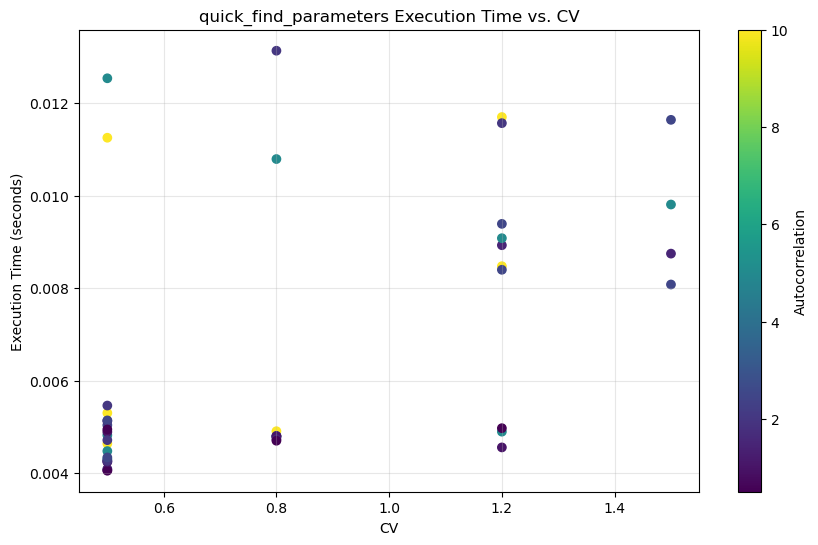

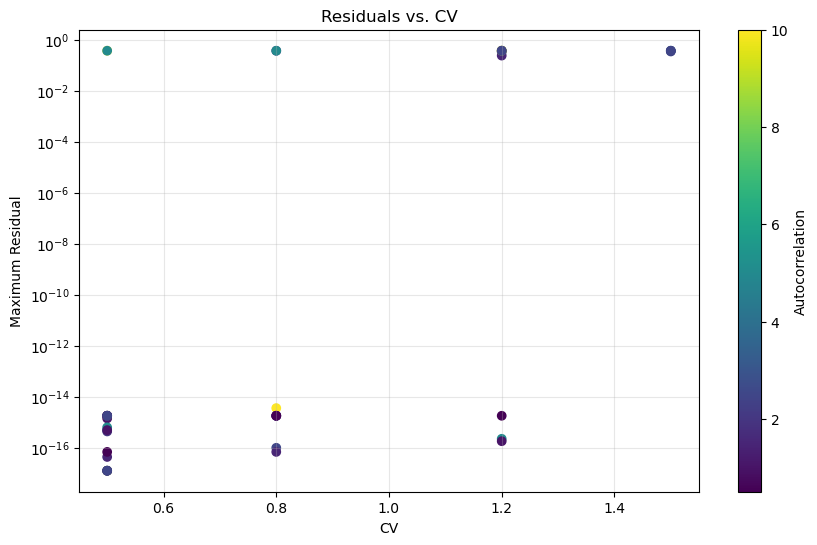

In [36]:
# Test quick_find_parameters with a range of values
import pandas as pd
import matplotlib.pyplot as plt


# Define ranges to test
sigma_b_values = [0.1, 0.5, 1.0, 2.0]
cv_values = [0.5, 0.8, 1.2, 1.5]
autocorr_values = [0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
mu_target = 10.0

# Create a grid of test cases
results = []

for sigma_b in sigma_b_values:
    for cv in cv_values:
        for autocorr in autocorr_values:
            try:
                start_time = time.time()
                rho, sigma_u, d = quick_find_parameters(
                    sigma_b=sigma_b,
                    mu_target=mu_target,
                    autocorr_target=autocorr,
                    cv_target=cv
                )
                elapsed_time = time.time() - start_time
                
                # Check residuals
                residuals = equations((rho, sigma_u, d), sigma_b, mu_target, None, autocorr, cv, None)
                max_residual = max(abs(r) for r in residuals)
                
                results.append({
                    'sigma_b': sigma_b,
                    'cv': cv,
                    'autocorr': autocorr,
                    'rho': rho,
                    'sigma_u': sigma_u,
                    'd': d,
                    'time': elapsed_time,
                    'max_residual': max_residual,
                    'success': True
                })
                
            except Exception as e:
                results.append({
                    'sigma_b': sigma_b,
                    'cv': cv,
                    'autocorr': autocorr,
                    'error': str(e),
                    'success': False
                })

# Convert to DataFrame for analysis
df_results = pd.DataFrame(results)

# Display summary
print(f"Total test cases: {len(df_results)}")
print(f"Successful cases: {df_results['success'].sum()}")
print(f"Failed cases: {(~df_results['success']).sum()}")

if df_results['success'].sum() > 0:
    success_df = df_results[df_results['success']]
    print(f"\nAverage execution time: {success_df['time'].mean():.6f} seconds")
    print(f"Max execution time: {success_df['time'].max():.6f} seconds")
    print(f"Average max residual: {success_df['max_residual'].mean():.6e}")
    print(f"Max residual across all cases: {success_df['max_residual'].max():.6e}")

# If there were failures, display some information about them
if (~df_results['success']).sum() > 0:
    print("\nSome example failures:")
    failed_df = df_results[~df_results['success']]
    print(failed_df[['sigma_b', 'cv', 'autocorr', 'error']].head())

# Plot execution times for successful cases
if df_results['success'].sum() > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(success_df['cv'], success_df['time'], c=success_df['autocorr'], cmap='viridis')
    plt.colorbar(label='Autocorrelation')
    plt.xlabel('CV')
    plt.ylabel('Execution Time (seconds)')
    plt.title('quick_find_parameters Execution Time vs. CV')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(success_df['cv'], success_df['max_residual'], c=success_df['autocorr'], cmap='viridis')
    plt.colorbar(label='Autocorrelation')
    plt.xlabel('CV')
    plt.ylabel('Maximum Residual')
    plt.yscale('log')
    plt.title('Residuals vs. CV')
    
    plt.grid(True, alpha=0.3)
    plt.show()

In [40]:
# Stress test quick_find_parameters with edge cases
import numpy as np
from simulation.mean_var_autocorr import find_parameters
import random

print("Stress testing quick_find_parameters with challenging cases...")

# Test cases that might be challenging
test_cases = [
    {"name": "Low autocorrelation", "sigma_b": 0.3, "mu": 5.0, "autocorr": 8.0, "cv": 0.9},
    {"name": "High autocorrelation", "sigma_b": 0.3, "mu": 5.0, "autocorr": 12.0, "cv": 0.9},
    {"name": "Low CV", "sigma_b": 0.3, "mu": 5.0, "autocorr": 9.5, "cv": 0.5},
    {"name": "Moderate CV", "sigma_b": 0.3, "mu": 5.0, "autocorr": 10.0, "cv": 1.0},
    {"name": "High CV (edge)", "sigma_b": 0.3, "mu": 5.0, "autocorr": 11.0, "cv": 2.0},
    {"name": "Very high CV (should fail)", "sigma_b": 0.3, "mu": 5.0, "autocorr": 10.5, "cv": 5.0},
    {"name": "Low sigma_b", "sigma_b": 0.05, "mu": 5.0, "autocorr": 9.0, "cv": 0.9},
    {"name": "High sigma_b", "sigma_b": 5.0, "mu": 5.0, "autocorr": 10.2, "cv": 1.5},
    {"name": "Extreme case (high mu, high autocorr, moderate CV)", "sigma_b": 0.1, "mu": 20.0, "autocorr": 10.8, "cv": 1.5},
]

for case in test_cases:
    print(f"\nTesting: {case['name']}")
    print(f"Parameters: sigma_b={case['sigma_b']}, mu={case['mu']}, autocorr={case['autocorr']}, cv={case['cv']}")
    
    # Try quick_find_parameters
    start_time = time.time()
    try:
        quick_result = quick_find_parameters(
            sigma_b=case['sigma_b'],
            mu_target=case['mu'],
            autocorr_target=case['autocorr'],
            cv_target=case['cv']
        )
        quick_time = time.time() - start_time
        print(f"quick_find_parameters: Success in {quick_time:.6f} seconds")
        print(f"  rho = {quick_result[0]:.6f}")
        print(f"  sigma_u = {quick_result[1]:.6f}")
        print(f"  d = {quick_result[2]:.6f}")
    except Exception as e:
        print(f"quick_find_parameters: Failed - {str(e)}")
    
    # # Try the original find_parameters for comparison
    # start_time = time.time()
    # try:
    #     parameter_set = {"sigma_b": 9.0}  # Initial guess
    #     original_result = find_parameters(
    #         parameter_set,
    #         mu_target=case['mu'],
    #         autocorr_target=case['autocorr'],
    #         cv_target=case['cv'],
    #         num_guesses=500
    #     )
    #     original_time = time.time() - start_time
    #     print(f"find_parameters: Success in {original_time:.6f} seconds")
    #     print(f"  rho = {original_result[0]:.6f}")
    #     print(f"  sigma_b = {original_result[1]:.6f}")
    #     print(f"  d = {original_result[2]:.6f}")
    # except Exception as e:
    #     print(f"find_parameters: Failed - {str(e)}")

print("\nStress testing complete!")

Stress testing quick_find_parameters with challenging cases...

Testing: Low autocorrelation
Parameters: sigma_b=0.3, mu=5.0, autocorr=8.0, cv=0.9
quick_find_parameters: Failed - Could not find a valid solution for parameter d

Testing: High autocorrelation
Parameters: sigma_b=0.3, mu=5.0, autocorr=12.0, cv=0.9
quick_find_parameters: Failed - Could not find a valid solution for parameter d

Testing: Low CV
Parameters: sigma_b=0.3, mu=5.0, autocorr=9.5, cv=0.5
Found valid solution for D=-5.1084346557493525: rho=0.6872283354264376, sigma_u=0.06291159651626534, d=0.11361913072330883
Found solution: rho=0.6872, sigma_u=0.0629, d=0.1136
quick_find_parameters: Success in 0.005433 seconds
  rho = 0.687228
  sigma_u = 0.062912
  d = 0.113619

Testing: Moderate CV
Parameters: sigma_b=0.3, mu=5.0, autocorr=10.0, cv=1.0
quick_find_parameters: Failed - Could not find a valid solution for parameter d

Testing: High CV (edge)
Parameters: sigma_b=0.3, mu=5.0, autocorr=11.0, cv=2.0
quick_find_paramete

/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: overflow encountered in multiply
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: invalid value encountered in add
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: overflow encountered in exp
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:37: RuntimeWarning: invalid value encountered in divide
  cv_sq_target = cv_target ** 2
/home/ianyang/stochastic_simulations/src/simulation/mean_cv_autocorr.py:32: RuntimeWarning: overflow encountered in exp
  def d_equation_exp(D):


In [ ]:
# Test the problematic case from the original bug
import numpy as np
from simulation.mean_var_autocorr import quick_find_parameters

print("Testing quick_find_parameters on the problematic case from the original bug...")

# Define test parameters that caused issues
variance_target_normal = 1200.0  # Fixed normal variance
mu_target = 10.0                 # Mean (same for both)
ratio = 2.57  # The problematic ratio from earlier
variance_target_stress = ratio * variance_target_normal
autocorr_target = 0.5

# Calculate CV from variance and mean
cv_normal = np.sqrt(variance_target_normal) / mu_target
cv_stress = np.sqrt(variance_target_stress) / mu_target

print(f"Normal condition: Variance = {variance_target_normal}, Mean = {mu_target}, CV = {cv_normal:.4f}")
print(f"Stress condition: Variance = {variance_target_stress}, Mean = {mu_target}, CV = {cv_stress:.4f}")

# Parameters for both conditions
parameters = {
    "stress": {"sigma_b": 0.1},  # Try different sigma_b values
    "normal": {"sigma_b": 0.1}
}

# Try to solve each condition
results = {}
for condition, param in parameters.items():
    sigma_b = param["sigma_b"]
    
    # Select the appropriate CV for this condition
    if condition == "normal":
        cv_for_condition = cv_normal
    else:  # condition == "stress"
        cv_for_condition = cv_stress
        
    print(f"\nSolving for {condition.upper()} condition with sigma_b = {sigma_b}:")
    
    try:
        # Try quick_find_parameters first
        start_time = time.time()
        rho, sigma_u, d = quick_find_parameters(
            sigma_b=sigma_b,
            mu_target=mu_target,
            autocorr_target=autocorr_target,
            cv_target=cv_for_condition
        )
        quick_time = time.time() - start_time
        
        results[condition] = {
            "method": "quick",
            "rho": rho, 
            "sigma_b": sigma_b, 
            "sigma_u": sigma_u,
            "d": d,
            "time": quick_time
        }
        
        print(f"✅ Found solution using quick_find_parameters in {quick_time:.6f} seconds:")
        print(f"  rho = {rho:.6f}")
        print(f"  sigma_u = {sigma_u:.6f}")
        print(f"  d = {d:.6f}")
        
    except Exception as e:
        print(f"❌ quick_find_parameters failed: {str(e)}")
        
        # If quick method failed, try the original method
        try:
            start_time = time.time()
            parameter_set = {"sigma_u": 9.0}
            rho, sigma_b_result, d = find_parameters(
                parameter_set,
                mu_target=mu_target,
                autocorr_target=autocorr_target,
                cv_target=cv_for_condition,
                num_guesses=1000
            )
            original_time = time.time() - start_time
            
            results[condition] = {
                "method": "original",
                "rho": rho, 
                "sigma_b": sigma_b_result, 
                "sigma_u": param["sigma_u"],
                "d": d,
                "time": original_time
            }
            
            print(f"✅ Found solution using find_parameters in {original_time:.6f} seconds:")
            print(f"  rho = {rho:.6f}")
            print(f"  sigma_b = {sigma_b_result:.6f}")
            print(f"  d = {d:.6f}")
            
        except Exception as e2:
            print(f"❌ find_parameters also failed: {str(e2)}")

# If both conditions were solved, update parameter sets
if len(results) == 2:
    parameter_sets = [
        {
            "sigma_u": results["stress"]["sigma_u"], 
            "sigma_b": results["stress"]["sigma_b"], 
            "rho": results["stress"]["rho"], 
            "d": results["stress"]["d"], 
            "label": 0
        },
        {
            "sigma_u": results["normal"]["sigma_u"], 
            "sigma_b": results["normal"]["sigma_b"], 
            "rho": results["normal"]["rho"], 
            "d": results["normal"]["d"], 
            "label": 1
        }
    ]
    
    print("\nUpdated Parameter Sets:")
    print(parameter_sets)
    
    # Calculate times for running simulations, etc.
    min_d = min(pset['d'] for pset in parameter_sets)
    steady_state_time = int(10 / min_d)
    time_points = np.arange(0, 144.0, 1.0)
    extended_time_points = np.arange(
        time_points[0],
        len(time_points) + steady_state_time,
        time_points[1] - time_points[0]
    )
    
    print(f"\nMin d: {min_d:.4f}")
    print(f"Steady state time: {steady_state_time}")
    print(f"Time points: {len(time_points)}")
    print(f"Extended time points: {len(extended_time_points)}")